In [47]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import g3py as g3
import theano as th
import matplotlib.pyplot as plt

th.config.warn_float64 = 'raise'

g3.style_seaborn()
g3.style_widget()

x = np.linspace(0,1,300)
kernel = g3.SM(x)
gp = g3.GaussianProcess(space=x, location=g3.Zero(), kernel=g3.OU(x)+0.00001*g3.KernelNoise(), noisy=False)

In [48]:
gp.params

{'GP_KernelNoise_var_log__': array(-1.3862943649291992, dtype=float32),
 'GP_OU_rate_log__': array([ 0.], dtype=float32),
 'GP_OU_var_log__': array(-1.3862943649291992, dtype=float32)}

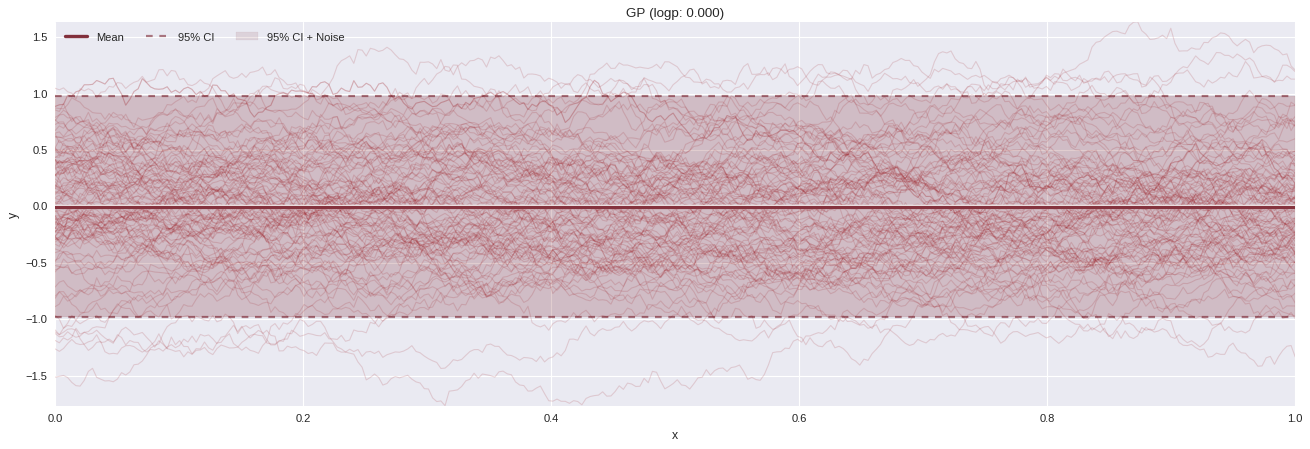

In [49]:
gp.plot(samples=100)

Total: 300 | Obs: 15 (5.0%)


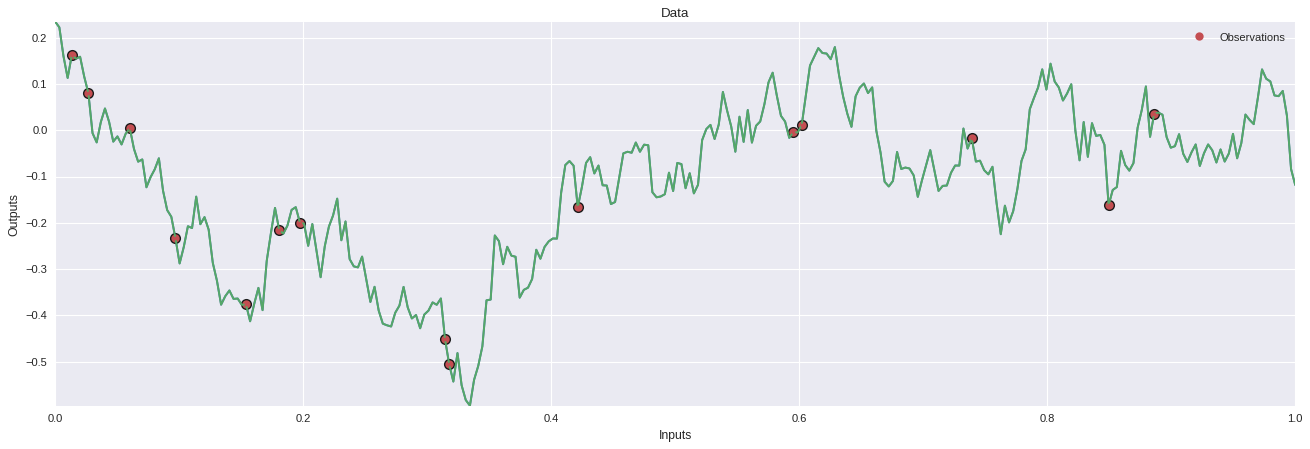

In [50]:
np.random.seed(123456)
y = gp.sample()[:,0]
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.05)
plt.plot(x,y)
plt.plot(x_obs,y_obs,'r.')

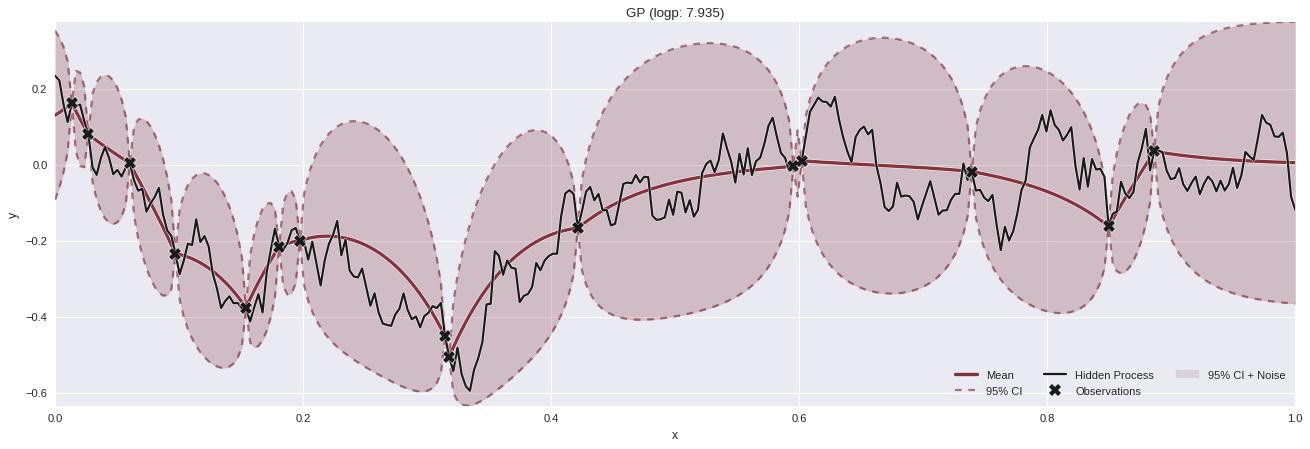

In [51]:
gp.set_space(hidden=y)
gp.observed(x_obs, y_obs)
gp.plot()

In [61]:
dt0 = gp.sample_hypers(samples=10)
dt0 = dt0[:1]
dt0

Sampling 3 variables, 6 chains, 10 times (None temps)


100%|██████████| 10/10 [00:00<00:00, 327.52it/s]


,GP_KernelNoise_var_log__,GP_OU_rate_log____0,GP_OU_var_log__,GP_KernelNoise_var_,GP_OU_rate__0,GP_OU_var_,_nchain,_niter,_burnin,_outlayer,_ll,_cluster
0,-3.285121,2.265098,-2.94579,0.037436,9.632065,0.052561,0,0,False,True,8.574594,2


In [62]:
gp.active.fix_vars(dt0, keys=['GP_KernelNoise_var_log__'])

In [89]:
dt = gp.sample_hypers(chains=6, samples=100000, clusters=None)

Sampling 2 variables, 6 chains, 100000 times (None temps)


100%|██████████| 100000/100000 [03:53<00:00, 429.12it/s]


'TODO: Check THIS complete_chain with MEAN'


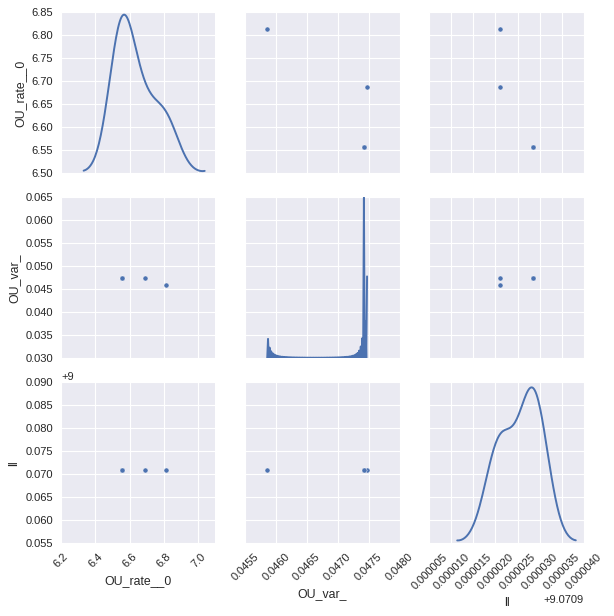

In [94]:
g3.scatter_datatrace(dt[dt._ll>9.07092], items=['GP_OU_rate__0','GP_OU_var_','_ll'])

In [99]:
dt['c'] = dt['GP_OU_var_']*np.sqrt(dt['GP_OU_rate__0'])

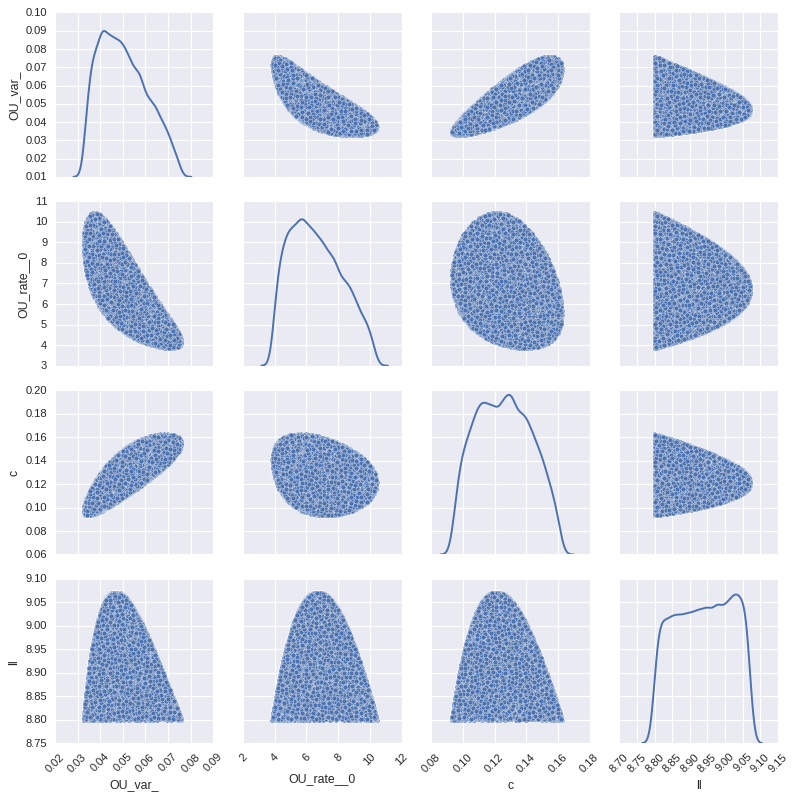

In [106]:
g3.scatter_datatrace(dt[dt._ll>8.8], items=['GP_OU_var_','GP_OU_rate__0','c','_ll'])

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-3.28512114967, right=-3.28512114967
  'left=%s, right=%s') % (left, right))
/opt/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-3.28512114967, top=-3.28512114967
  'bottom=%s, top=%s') % (bottom, top))
/opt/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0374360457063, right=0.0374360457063
  'left=%s, right=%s') % (left, right))
/opt/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expandi

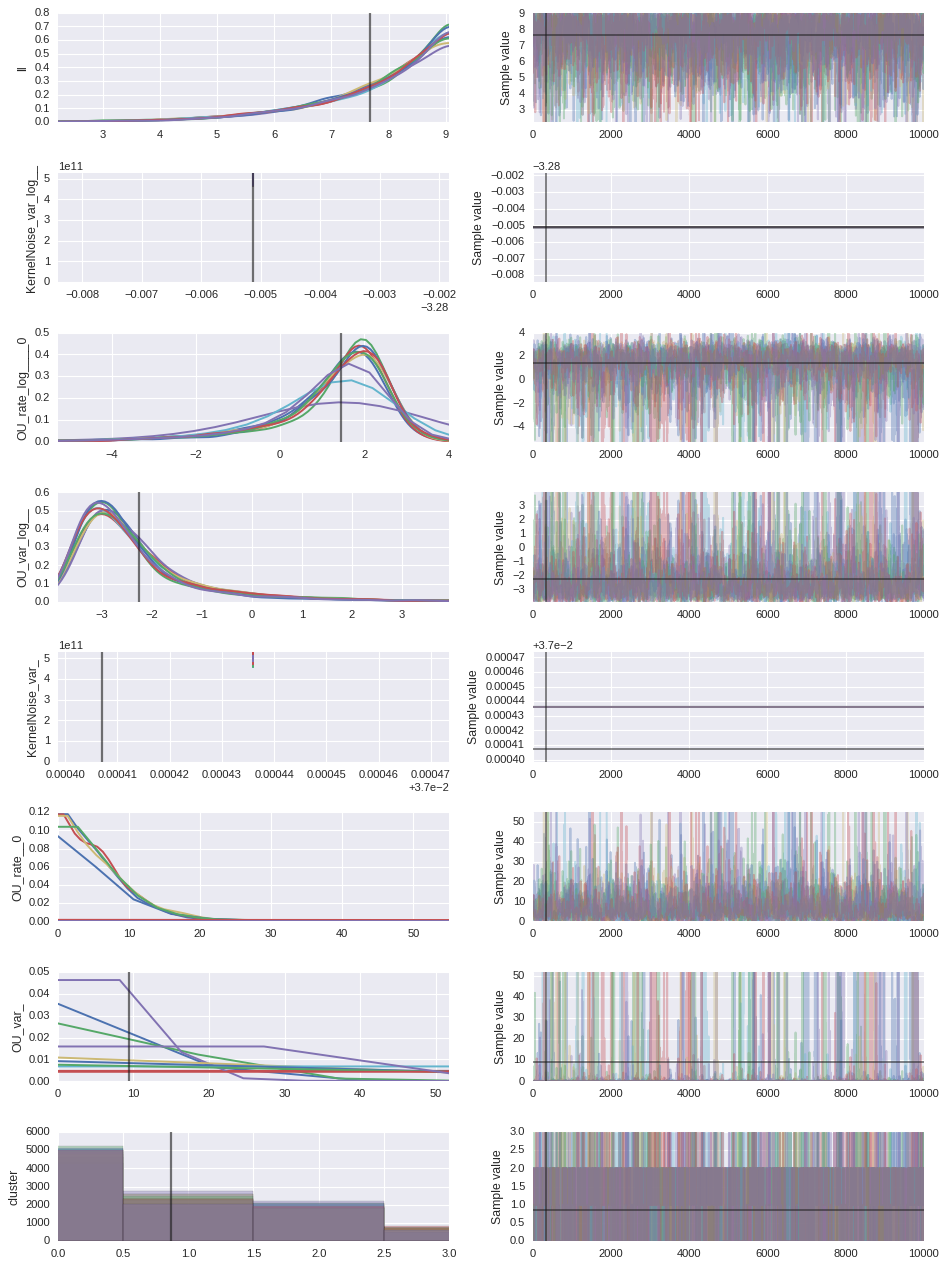

In [67]:
g3.plot_datatrace(dt)

In [112]:
p1 = gp.find_MAP()

'Starting function value (-logp): -7.93493080139'
'start_bfgs'
         Current function value: -9.071568
         Iterations: 6
         Function evaluations: 67
         Gradient evaluations: 55
'find_MAP'
{'GP_KernelNoise_var_log__': array(-3.300279140472412, dtype=float32),
 'GP_OU_rate_log__': array([ 1.90359437], dtype=float32),
 'GP_OU_var_log__': array(-3.062703847885132, dtype=float32)}


In [116]:
p1, gp.logp(p1)

({'GP_KernelNoise_var_log__': array(-3.300279140472412, dtype=float32),
  'GP_OU_rate_log__': array([ 1.90359437], dtype=float32),
  'GP_OU_var_log__': array(-3.062703847885132, dtype=float32)},
 array(9.07156753540039, dtype=float32))

In [120]:
dt.loc[dt._ll.argmax()]

/opt/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


GP_KernelNoise_var_log__    -3.28512
GP_OU_rate_log____0          1.90385
GP_OU_var_log__             -3.06269
GP_KernelNoise_var_         0.037436
GP_OU_rate__0                6.71168
GP_OU_var_                  0.046762
_nchain                            0
_niter                         13891
_burnin                         True
_outlayer                      False
_ll                          9.07156
c                           0.121146
Name: 13891, dtype: object